# Stats Assignment 1


## Import libraies

In [524]:
# numerics
import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm

# graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from plotnine import ggplot, aes, geom_line, geom_point, geom_smooth

## Read the dataset

### Read the original datafile into a dataframe

In [527]:
# function to read original data
def df_org(file):
    # Open a file
    f = open(file, 'r')

    # Read the data
    df_original = pd.read_csv(f, header=0, sep=',')
    df_original = pd.DataFrame(df_original, dtype='object')

    # Close the file
    f.close()
    return df_original

In [528]:
# read original data
df_original = df_org('./MavenRail.csv')
df_original

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00,2024-04-30 20:30,2024-04-30 20:30,On Time,NaN,No
31641,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15,2024-04-30 21:35,2024-04-30 21:35,On Time,NaN,No
31642,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15,2024-04-30 20:45,2024-04-30 20:45,On Time,NaN,No
31643,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15,2024-04-30 22:35,2024-04-30 22:35,On Time,NaN,No


In [529]:
# read original dataset for prediction
df_predict_original = df_org('./ToPredict.csv')
df_predict_original

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay
0,Debit Card,NaN,First Class,Advance,54,London St Pancras,Birmingham New Street,2024-01-04 17:45,2024-01-04 19:05,2024-01-04 19:05,On Time,NaN
1,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-05 08:15,2024-01-05 09:35,2024-01-05 09:35,On Time,NaN
2,Debit Card,NaN,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-01-09 15:30,2024-01-09 17:45,2024-01-09 18:07,Delayed,Staffing
3,Contactless,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45,2024-01-31 06:15,2024-01-31 06:49,Delayed,Signal Failure
4,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00,2024-02-10 16:30,NaN,Cancelled,Technical Issue
5,Contactless,NaN,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-02-25 15:45,2024-02-25 16:15,NaN,Cancelled,Staffing
6,Debit Card,NaN,Standard,Off-Peak,126,Manchester Piccadilly,London Euston,2024-03-20 15:30,2024-03-20 17:20,2024-03-20 17:36,Delayed,Staffing
7,Credit Card,NaN,Standard,Advance,22,Birmingham New Street,London St Pancras,2024-04-16 04:30,2024-04-16 05:50,NaN,Cancelled,Signal Failure


In [530]:
# output original data info
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Payment.Method     31645 non-null  object
 1   Railcard           10734 non-null  object
 2   Ticket.Class       31645 non-null  object
 3   Ticket.Type        31645 non-null  object
 4   Price              31645 non-null  object
 5   Departure.Station  31645 non-null  object
 6   Arrival.Station    31645 non-null  object
 7   Departure          31642 non-null  object
 8   Scheduled.Arrival  31641 non-null  object
 9   Actual.Arrival     29765 non-null  object
 10  Journey.Status     31645 non-null  object
 11  Reason.for.Delay   4166 non-null   object
 12  Refund.Request     31645 non-null  object
dtypes: object(13)
memory usage: 3.1+ MB


### Read the datafile into a dataframe for analysis

In [532]:
# function to create dataframe for the specific analysises
def df_delayinmin(file):
    # open a file
    f = open(file, 'r')

    # read the data
    df_original = pd.read_csv(f, header=0, sep=',')
    df_original = pd.DataFrame(df_original, dtype='object')

    # close the file
    f.close()
    
    # add column "DelayInMinutes"
    df_original["DelayInMinutes"] = np.nan
    df_DelayInMinutes = df_original
    df_DelayInMinutes
    
    # convert the type of dates into DateTime objects  
    df_DelayInMinutes["Scheduled.Arrival"] = pd.to_datetime( df_DelayInMinutes["Scheduled.Arrival"], format='%Y-%m-%d %H:%M' )
    df_DelayInMinutes["Actual.Arrival"] = pd.to_datetime( df_DelayInMinutes["Actual.Arrival"], format='%Y-%m-%d %H:%M' )
    
    df_DelayInMinutes
    
    # calculate delay in minutes
    secs_per_min = 60 

    for i in range(len(df_DelayInMinutes)):
        if df_DelayInMinutes.loc[i, "Journey.Status"] == "Delayed":
            df_DelayInMinutes.loc[i, "DelayInMinutes"] = df_DelayInMinutes.loc[i, 'Actual.Arrival'] - df_DelayInMinutes.loc[i, 'Scheduled.Arrival']
            df_DelayInMinutes.loc[i, "DelayInMinutes"] = df_DelayInMinutes.loc[i, "DelayInMinutes"].total_seconds() / secs_per_min

    df_delayed = df_DelayInMinutes
    
    # add three attributes for time periods
    df_delayed["DelayedMonth"] = np.nan
    df_delayed["DelayedDay"] = np.nan
    df_delayed["DelayedHour"] = np.nan
    
    for index,row in df_delayed.iterrows():
        df_delayed.loc[index, "DelayedMonth"] = df_delayed.loc[index, "Actual.Arrival"].month
        df_delayed.loc[index, "DelayedDay"] = df_delayed.loc[index, "Actual.Arrival"].day
        df_delayed.loc[index, "DelayedHour"] = df_delayed.loc[index, "Actual.Arrival"].hour
    
    return df_delayed

In [533]:
# create dataframe to perform analysis
df_delayed = df_delayinmin('./MavenRail.csv')
df_delayed

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,DelayInMinutes,DelayedMonth,DelayedDay,DelayedHour
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,NaN,No,NaN,1.0,1.0,13.0
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,5.0,1.0,1.0,11.0
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,NaN,No,NaN,1.0,2.0,18.0
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,NaN,No,NaN,1.0,1.0,22.0
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,NaN,No,NaN,1.0,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00,2024-04-30 20:30:00,2024-04-30 20:30:00,On Time,NaN,No,NaN,4.0,30.0,20.0
31641,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15,2024-04-30 21:35:00,2024-04-30 21:35:00,On Time,NaN,No,NaN,4.0,30.0,21.0
31642,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15,2024-04-30 20:45:00,2024-04-30 20:45:00,On Time,NaN,No,NaN,4.0,30.0,20.0
31643,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15,2024-04-30 22:35:00,2024-04-30 22:35:00,On Time,NaN,No,NaN,4.0,30.0,22.0


In [534]:
# create dataframe to perform prediction
df_predict_delayed = df_delayinmin('./ToPredict.csv')
df_predict_delayed

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,DelayInMinutes,DelayedMonth,DelayedDay,DelayedHour
0,Debit Card,NaN,First Class,Advance,54,London St Pancras,Birmingham New Street,2024-01-04 17:45,2024-01-04 19:05:00,2024-01-04 19:05:00,On Time,NaN,NaN,1.0,4.0,19.0
1,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-05 08:15,2024-01-05 09:35:00,2024-01-05 09:35:00,On Time,NaN,NaN,1.0,5.0,9.0
2,Debit Card,NaN,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-01-09 15:30,2024-01-09 17:45:00,2024-01-09 18:07:00,Delayed,Staffing,22.0,1.0,9.0,18.0
3,Contactless,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-31 05:45,2024-01-31 06:15:00,2024-01-31 06:49:00,Delayed,Signal Failure,34.0,1.0,31.0,6.0
4,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-02-10 16:00,2024-02-10 16:30:00,NaT,Cancelled,Technical Issue,NaN,NaN,NaN,NaN
5,Contactless,NaN,Standard,Advance,3,Manchester Piccadilly,Liverpool Lime Street,2024-02-25 15:45,2024-02-25 16:15:00,NaT,Cancelled,Staffing,NaN,NaN,NaN,NaN
6,Debit Card,NaN,Standard,Off-Peak,126,Manchester Piccadilly,London Euston,2024-03-20 15:30,2024-03-20 17:20:00,2024-03-20 17:36:00,Delayed,Staffing,16.0,3.0,20.0,17.0
7,Credit Card,NaN,Standard,Advance,22,Birmingham New Street,London St Pancras,2024-04-16 04:30,2024-04-16 05:50:00,NaT,Cancelled,Signal Failure,NaN,NaN,NaN,NaN


In [535]:
# add column "MediumPrice"
df_MediumPrice = df_delayed[df_delayed["Journey.Status"] != "On Time"]

for index,row in df_MediumPrice.iterrows():
    if 10 < row["Price"] <= 30:
        df_MediumPrice.loc[index, "MediumPrice"] = 1
    else:
        df_MediumPrice.loc[index, "MediumPrice"] = 0
    
df_MediumPrice

C:\Users\teppe\AppData\Local\Temp\ipykernel_7880\966578517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,DelayInMinutes,DelayedMonth,DelayedDay,DelayedHour,MediumPrice
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,5.0,1.0,1.0,11.0,1.0
8,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-01-01 00:00,2024-01-01 01:50:00,2024-01-01 02:07:00,Delayed,Signal Failure,No,17.0,1.0,1.0,2.0,0.0
20,Debit Card,Adult,Standard,Advance,7,Birmingham New Street,Manchester Piccadilly,2024-01-01 11:15,2024-01-01 12:35:00,2024-01-01 13:06:00,Delayed,Technical Issue,Yes,31.0,1.0,1.0,13.0,0.0
26,Credit Card,Senior,First Class,Advance,34,Oxford,Bristol Temple Meads,2024-01-01 14:15,2024-01-01 15:30:00,2024-01-01 15:54:00,Delayed,Signal Failure,Yes,24.0,1.0,1.0,15.0,0.0
39,Credit Card,NaN,Standard,Advance,7,London Euston,Birmingham New Street,2024-01-02 02:15,2024-01-02 03:35:00,NaT,Cancelled,Technical Issue,No,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,Debit Card,Senior,First Class,Anytime,144,London Euston,Manchester Piccadilly,2024-04-30 18:45,2024-04-30 20:35:00,NaT,Cancelled,Signal Failure,No,NaN,NaN,NaN,NaN,0.0
31633,Credit Card,Adult,Standard,Anytime,95,London Euston,Manchester Piccadilly,2024-04-30 18:45,2024-04-30 20:35:00,NaT,Cancelled,Signal Failure,Yes,NaN,NaN,NaN,NaN,0.0
31634,Contactless,NaN,Standard,Anytime,5,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 18:45,2024-04-30 19:15:00,NaT,Cancelled,Weather,No,NaN,NaN,NaN,NaN,0.0
31636,Credit Card,NaN,Standard,Anytime,16,London St Pancras,Birmingham New Street,2024-04-30 18:45,2024-04-30 20:05:00,NaT,Cancelled,Signal Failure,No,NaN,NaN,NaN,NaN,1.0


### Summary Stats

In [537]:
# Get basic stats
df_MediumPrice.describe()

,Scheduled.Arrival,Actual.Arrival,DelayedMonth,DelayedDay,DelayedHour,MediumPrice
count,4165,2289,2289.000000,2289.000000,2289.000000,4166.000000
mean,2024-03-02 06:36:18.655462400,2024-03-02 00:02:21.572739072,2.499782,15.982525,12.702490,0.179789
min,2024-01-01 01:50:00,2024-01-01 02:07:00,1.000000,1.000000,2.000000,0.000000
25%,2024-02-01 09:30:00,2024-02-02 05:46:00,2.000000,9.000000,10.000000,0.000000
50%,2024-03-03 19:45:00,2024-03-03 16:25:00,3.000000,15.000000,11.000000,0.000000
75%,2024-03-31 05:20:00,2024-03-30 10:56:00,3.000000,23.000000,18.000000,0.000000
max,2024-04-30 20:35:00,2024-04-30 20:13:00,4.000000,31.000000,20.000000,1.000000
std,NaN,NaN,1.095575,8.543730,4.469907,0.384058


## Exploratory Data Analysis

### Delay in Minutes

C:\Users\teppe\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\teppe\anaconda3\lib\site-packages\numpy\lib\histograms.py:826: RuntimeWarning: invalid value encountered in less_equal


Text(0, 0.5, 'Count')

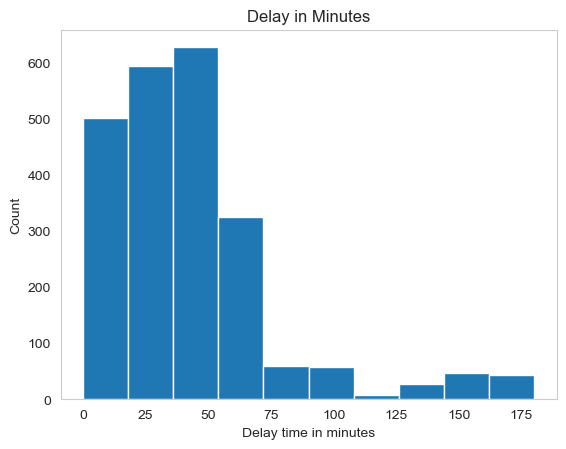

In [540]:
#plot histogram of DelayInMinutes
plt.hist(df_delayed["DelayInMinutes"])
plt.title("Delay in Minutes")
plt.xlabel('Delay time in minutes')
plt.ylabel('Count')

Text(0.5, 1.0, 'Histogram and Kernel Density Estimator for Delay In Minutes')

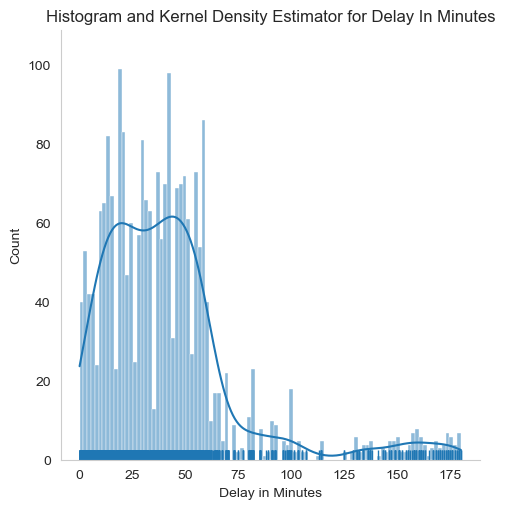

In [541]:
# plot histogram and kde
sns.displot( df_delayed["DelayInMinutes"], kde=True, rug=True, bins=100)
plt.xlabel('Delay in Minutes')
plt.ylabel('Count')
plt.title('Histogram and Kernel Density Estimator for Delay In Minutes')

### Payment method & ticket type vs price

In [543]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Encode data
df_ctg = df_original.copy()
df_ctg["Payment.Method"]= label_encoder.fit_transform(df_original["Payment.Method"])
df_ctg["Ticket.Type"]= label_encoder.fit_transform(df_original["Ticket.Type"])
df_ctg["Price"] = df_ctg["Price"].astype(float)
df_ctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Payment.Method     31645 non-null  int32  
 1   Railcard           10734 non-null  object 
 2   Ticket.Class       31645 non-null  object 
 3   Ticket.Type        31645 non-null  int32  
 4   Price              31645 non-null  float64
 5   Departure.Station  31645 non-null  object 
 6   Arrival.Station    31645 non-null  object 
 7   Departure          31642 non-null  object 
 8   Scheduled.Arrival  31641 non-null  object 
 9   Actual.Arrival     29765 non-null  object 
 10  Journey.Status     31645 non-null  object 
 11  Reason.for.Delay   4166 non-null   object 
 12  Refund.Request     31645 non-null  object 
dtypes: float64(1), int32(2), object(10)
memory usage: 2.9+ MB


### Delay Reasons

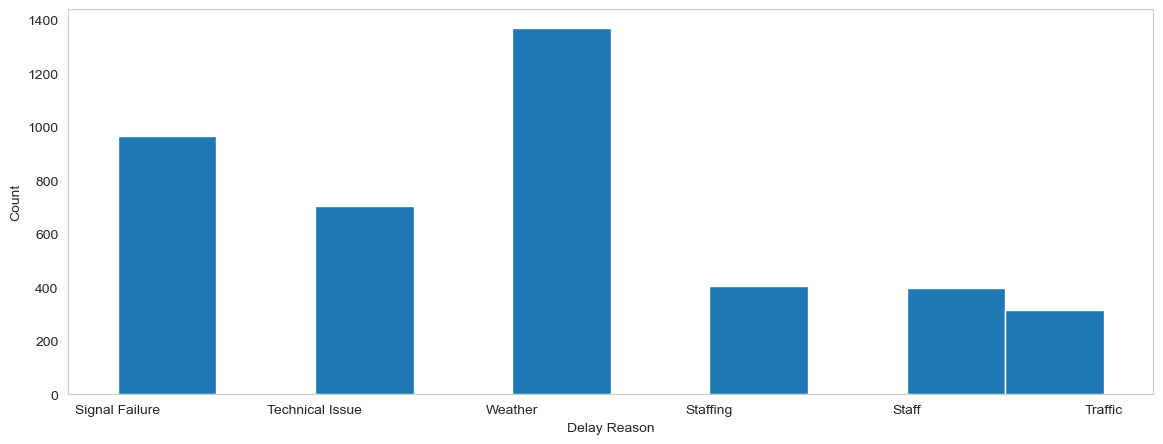

In [545]:
# plot histogram for delay reasons
plt.figure(figsize=(14, 5))
plt.hist(df_delayed["Reason.for.Delay"].dropna())
plt.xlabel('Delay Reason')
plt.ylabel('Count')
plt.show()

### Delayed Time Period

C:\Users\teppe\AppData\Local\Temp\ipykernel_7880\3817157574.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


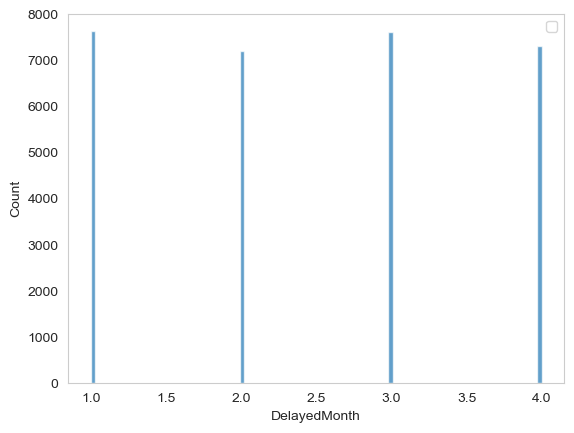

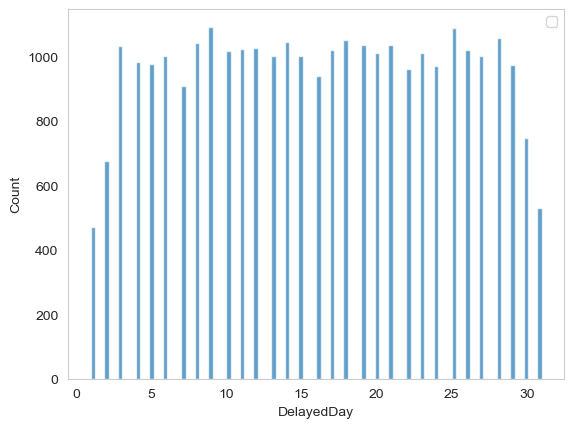

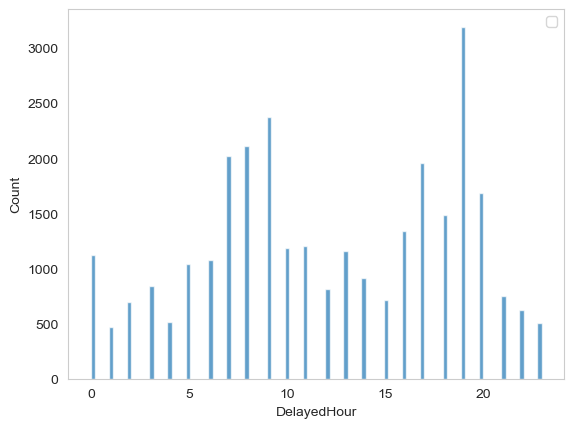

In [547]:
# plot histograms of delays in specific time periods (Month, Day, Hour)
df_delay_info = pd.concat([df_delayed["DelayedMonth"], df_delayed["DelayedDay"], df_delayed["DelayedHour"]], axis=1)

for col in df_delay_info.columns:
    plt.hist(df_delay_info[col], bins=100, alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

### Period and reason for delay, and delay time

C:\Users\teppe\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1878 rows containing missing values.


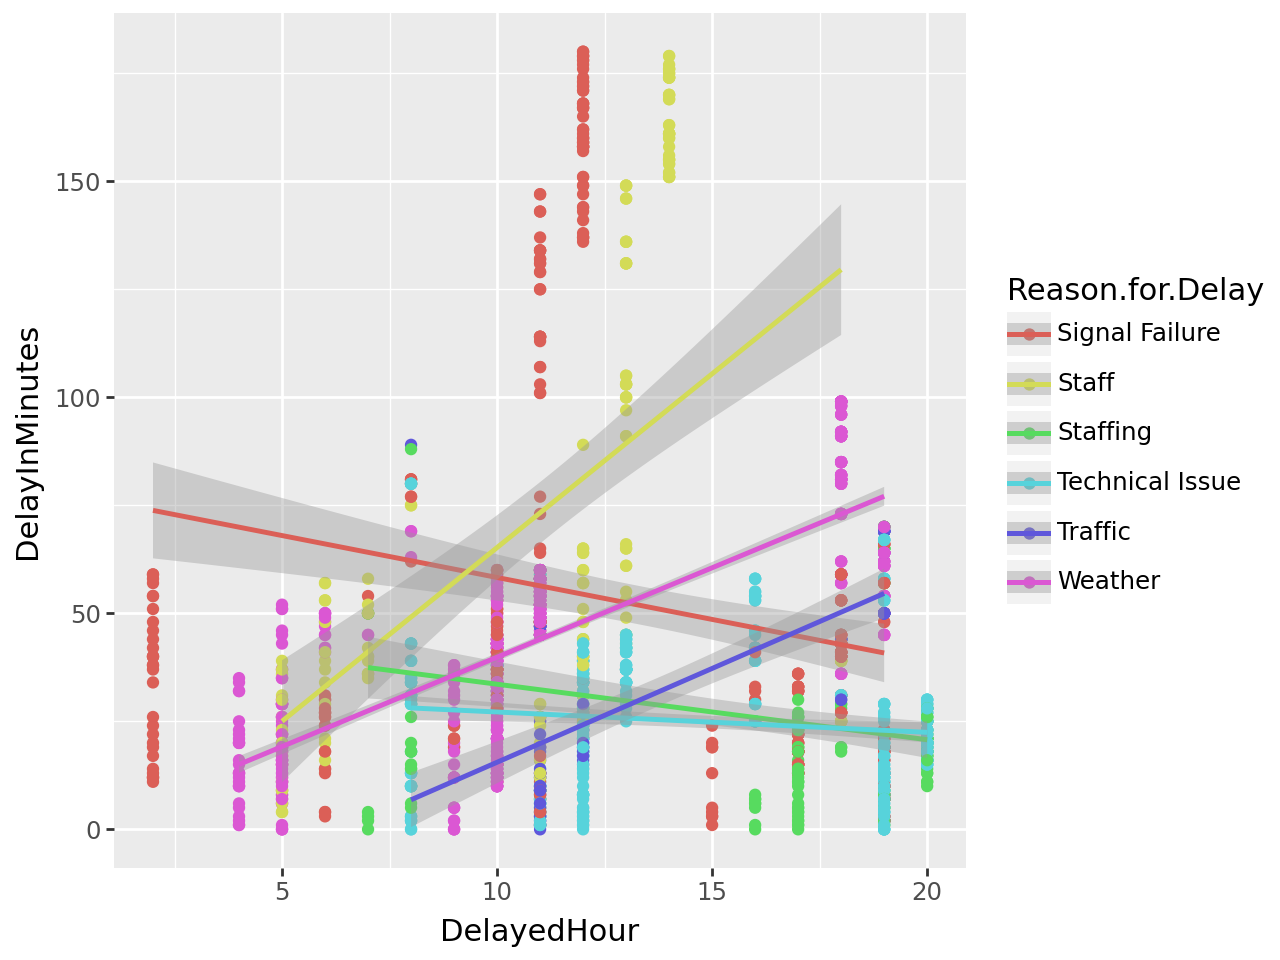

In [549]:
# plot DelayInMinutes against DelayedHour, colored according to delay reasons
df_delayed2 = df_delayed.copy()
df_delayed2 = df_delayed2.dropna(subset=["Reason.for.Delay"])
df_delayed2["DelayInMinutes"] = df_delayed2["DelayInMinutes"].astype(float)

(
    ggplot(df_delayed2)  # What data to use
    + aes(x="DelayedHour", y="DelayInMinutes", colour = "Reason.for.Delay")  # What variable to use
    + geom_point()  # Geometric object to use for drawing 
    + geom_smooth(method = "lm")
)

### Price

In [551]:
# convert price to numeric
x = df_original.Price.to_numpy()

Text(-2.1805555555555554, 0.5, 'Count')

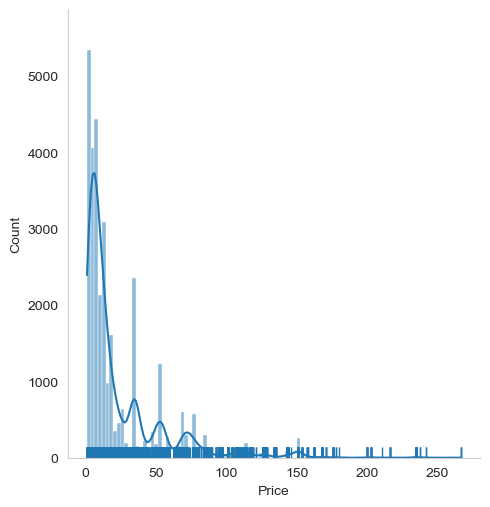

In [552]:
# plot histogram and kde for price
sns.displot( x, kde=True, rug=True, bins=100)
plt.xlabel('Price')
plt.ylabel('Count')

## Regressions

### Refund Request Status predicted by Medium Price Range

In [555]:
# set medium price as a predictor
df_reg1 = df_MediumPrice.copy()
df_reg1["MediumPrice"] = pd.to_numeric(df_reg1["MediumPrice"])

# set refund request as a response
for index,row in df_reg1.iterrows():
    if row["Refund.Request"] == "Yes":
        df_reg1.loc[index, "Refund.Request"] = 1
    else:
        df_reg1.loc[index, "Refund.Request"] = 0

df_reg1["Refund.Request"] = pd.to_numeric(df_reg1["Refund.Request"])

# set dependent/independent variables
X = df_reg1[["MediumPrice"]]
y = df_reg1["Refund.Request"]

# add constant
X = sm.add_constant(X)

# build the model
model = sm.GLM(y, X, family=sm.families.Binomial())

# fit data
result = model.fit()

#show result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Refund.Request   No. Observations:                 4166
Model:                            GLM   Df Residuals:                     4164
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2411.0
Date:                Thu, 14 Nov 2024   Deviance:                       4822.0
Time:                        20:54:27   Pearson chi2:                 4.17e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003852
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0757      0.039    -27.383      0.000      -1.153      -0.999
MediumPrice     0.3544      0.087      4.063      0.000       0.183       0.525
===============================================================================
"""

In [556]:
# perform prediction
predicted_prob = result.predict(X)
predicted_prob

1        0.327103
8        0.254317
20       0.254317
26       0.254317
39       0.254317
           ...   
31631    0.254317
31633    0.254317
31634    0.254317
31636    0.327103
31637    0.327103
Length: 4166, dtype: float64

In [557]:
# define function to calculate probability of refund
def prob1(x):
    p = 1 / (1 + np.e ** - (0.3544 * x + -1.0757))
    return p

In [558]:
print("Probability of refund if ticket costs 5£: ", round(prob1(0) * 100, 2), "%")

Probability of refund if ticket costs 5£:  25.43 %


In [559]:
print("Probability of refund if ticket costs 25£: ", round(prob1(1) * 100, 2), "%")

Probability of refund if ticket costs 25£:  32.71 %


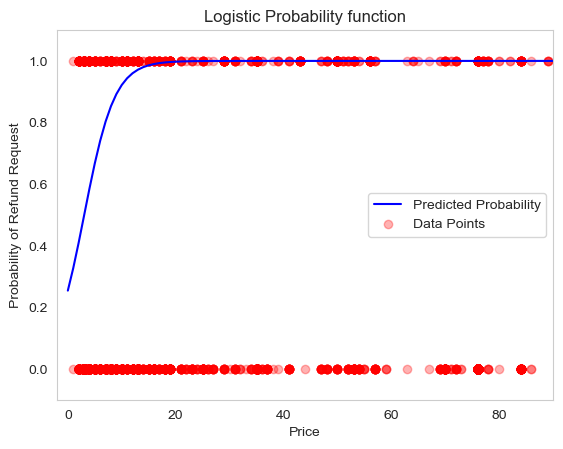

In [560]:
# plot refund request against price, with probability function of refund request
a = np.arange(0, 4166)


plt.plot(a, 1 / (1 + np.e ** - (0.3544 * a + -1.0757)), color="blue", label="Predicted Probability")
plt.scatter(df_reg1["Price"],df_reg1["Refund.Request"], alpha=0.3, label="Data Points", color="red")
plt.xlabel("Price")
plt.ylabel("Probability of Refund Request")
plt.title("Logistic Probability function")
plt.legend()
plt.xlim(-2, 90)
plt.ylim(-0.1, 1.1)
plt.show()

### Multivariate Regression performed against Refund Request

### Generalized Linear Model

In [563]:
# set medium price as a predictor
df_reg2 = df_reg1.dropna(subset=["DelayInMinutes"])

df_reg2["DelayInMinutes"] = pd.to_numeric(df_reg2["DelayInMinutes"])

# set dependent/independent variables
X_df = df_reg2[["DelayInMinutes"]]
y_df = df_reg2["Refund.Request"]

# add constant
X_df = sm.add_constant(X_df)

# build the model
model = sm.GLM(y_df, X_df, family=sm.families.Binomial())

# fit data
result = model.fit()

# show result
result.summary()

C:\Users\teppe\AppData\Local\Temp\ipykernel_7880\3001857762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Refund.Request   No. Observations:                 2288
Model:                            GLM   Df Residuals:                     2286
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -983.68
Date:                Thu, 14 Nov 2024   Deviance:                       1967.4
Time:                        20:54:28   Pearson chi2:                 1.86e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2111
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8156      0.104      7.829      0.000       0.611       1.020
DelayInMinutes    -0.0651      0.004    -18.106      0.000      -0.072      -0.058
==================================================================================
"""

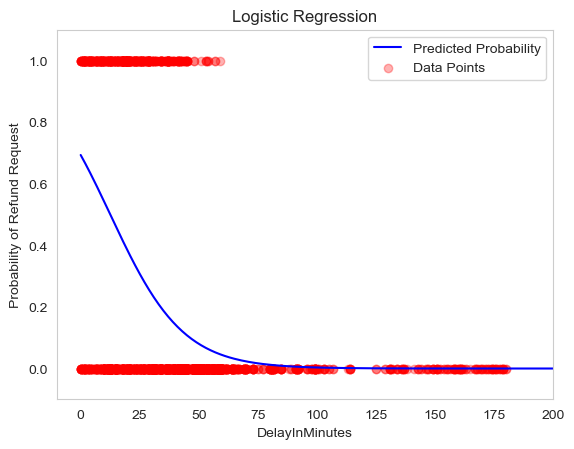

In [564]:
# plot probability of refund request against delay in minutes, with predicted probability
plt.plot(a, 1 / (1 + np.e ** - (-0.0651 * a + 0.8156)), color="blue", label="Predicted Probability")
plt.scatter(df_reg1["DelayInMinutes"], df_reg1["Refund.Request"], alpha=0.3, label="Data Points", color="red")
plt.xlabel("DelayInMinutes")
plt.ylabel("Probability of Refund Request")
plt.title("Logistic Regression")
plt.legend()
plt.xlim(-10, 200)
plt.ylim(-0.1, 1.1)
plt.show()

### Poisson

In [566]:
#import libraries to perform regressions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [567]:
df_reg2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2288 entries, 1 to 31629
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Payment.Method     2288 non-null   object        
 1   Railcard           881 non-null    object        
 2   Ticket.Class       2288 non-null   object        
 3   Ticket.Type        2288 non-null   object        
 4   Price              2288 non-null   object        
 5   Departure.Station  2288 non-null   object        
 6   Arrival.Station    2288 non-null   object        
 7   Departure          2288 non-null   object        
 8   Scheduled.Arrival  2288 non-null   datetime64[ns]
 9   Actual.Arrival     2288 non-null   datetime64[ns]
 10  Journey.Status     2288 non-null   object        
 11  Reason.for.Delay   2288 non-null   object        
 12  Refund.Request     2288 non-null   int64         
 13  DelayInMinutes     2288 non-null   float64       
 14  DelayedMonth

In [568]:
# set df
df_reg2["Price"] = pd.to_numeric(df_reg2["Price"])
df_reg2["Departure"] = pd.to_datetime(df_reg2["Departure"])
df_reg2["Departure"] = df_reg2["Departure"].astype('int64') / 10**9
df_reg2["Scheduled.Arrival"] = pd.to_datetime(df_reg2["Scheduled.Arrival"])
df_reg2["Scheduled.Arrival"] = df_reg2["Scheduled.Arrival"].astype('int64') / 10**9
df_reg2["Actual.Arrival"] = pd.to_datetime(df_reg2["Actual.Arrival"])
df_reg2["Actual.Arrival"] = df_reg2["Actual.Arrival"].astype('int64') / 10**9
df_q6 = df_reg2

#get dummies
df_q6 = pd.get_dummies(df_q6, drop_first=True)

# set dependent/independent variables
X = df_q6.drop('Refund.Request', axis=1)
y = df_q6['Refund.Request']

# set independent variables for prediction
X_pred = df_predict_delayed
X_pred["Price"] = pd.to_numeric(X_pred["Price"])
X_pred["DelayInMinutes"] = pd.to_numeric(X_pred["DelayInMinutes"])
X_pred["Departure"] = pd.to_datetime(X_pred["Departure"])
X_pred["Departure"] = X_pred["Departure"].astype('int64') / 10**9
X_pred["Scheduled.Arrival"] = pd.to_datetime(df_reg2["Scheduled.Arrival"])
X_pred["Scheduled.Arrival"] = X_pred["Scheduled.Arrival"].astype('int64') / 10**9
X_pred["Actual.Arrival"] = pd.to_datetime(df_reg2["Actual.Arrival"])
X_pred["Actual.Arrival"] = X_pred["Actual.Arrival"].astype('int64') / 10**9
X_pred = pd.get_dummies(X_pred, drop_first=True)

X, X_pred = X.align(X_pred, join='left', axis=1, fill_value=0)

# calculate correlation matrix
corr_matrix = df_q6.corr()
refund_corr = corr_matrix['Refund.Request'].sort_values(ascending=False)
significant_features = refund_corr[abs(refund_corr) >= 0.3].index.tolist() 
significant_features.remove('Refund.Request')

significant_features

C:\Users\teppe\AppData\Local\Temp\ipykernel_7880\3222489682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\teppe\AppData\Local\Temp\ipykernel_7880\3222489682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\teppe\AppData\Local\Temp\ipykernel_7880\3222489682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

['Payment.Method_Debit Card',
 'Reason.for.Delay_Technical Issue',
 'Arrival.Station_Manchester Piccadilly',
 'DelayedHour',
 'DelayInMinutes',
 'Reason.for.Delay_Weather',
 'Payment.Method_Credit Card']

In [569]:
# set columns for selected features
selected_columns = ['Payment.Method_Debit Card', 
                    'Reason.for.Delay_Technical Issue', 
                    'Arrival.Station_Manchester Piccadilly', 
                    'DelayedHour', 
                    'DelayInMinutes', 
                    'Reason.for.Delay_Weather', 
                    'Payment.Method_Credit Card']

X = X[selected_columns]
X_pred = X_pred[selected_columns]

# convert NaN
imputer = SimpleImputer(strategy='mean') 
X = imputer.fit_transform(X)
X_pred = imputer.fit_transform(X_pred)

# split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [570]:
X.shape

(2288, 7)

In [571]:
X_pred.shape

(8, 7)

In [572]:
# perform poisson regression
pr = PoissonRegressor()
pr.fit(X_train, y_train)
y_pr_predict = pr.predict(X_pred)
y_pred_pr = pr.predict(X_test)

print("Score(train): ", pr.score(X_train, y_train))
print("Score(test): ", pr.score(X_test, y_test))

print(y_pr_predict)

Score(train):  0.3998171213650088
Score(test):  0.42424986746954496
[0.49119166 0.17506915 0.48542456 0.1002546  0.28201385 0.28398252
 0.56012193 0.26873616]


### Multivariate Linear Regression

In [574]:
# perform multivariate linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_predict = lr.predict(X_pred)
y_pred_lr = lr.predict(X_test)

print("Score(train): ", lr.score(X_train, y_train))
print("Score(test): ", lr.score(X_test, y_test))

print(y_lr_predict)

Score(train):  0.6834405267637508
Score(test):  0.6819330626230268
[0.79554261 0.17914561 0.79471502 0.20015929 0.22242461 0.11787839
 0.80010417 0.1980382 ]


### Logistic Regression

In [576]:
# perform logistic regression
rl = LogisticRegression()
rl.fit(X_train, y_train)
y_rl_predict = rl.predict(X_pred)
y_pred_rl = rl.predict(X_test)

print("Score(train): ", rl.score(X_train, y_train))
print("Score(test): ", rl.score(X_test, y_test))

print(y_rl_predict)

# probability
prob = rl.predict_proba(X_pred)
class_1_prob = prob[:, 1]

# show result
result = pd.DataFrame({
    'Passenger': [f"Passenger {i+1}" for i in range(len(class_1_prob))],
    'Refund Request Probability (%)': (class_1_prob * 100).round(2),
    'Refund': ["No" if y_rl_predict[i] == 0 else "Yes" for i in range(len(class_1_prob))],
})

print(result)

Score(train):  0.9420765027322404
Score(test):  0.9454148471615721
[1 0 1 0 0 0 1 0]
     Passenger  Refund Request Probability (%) Refund
0  Passenger 1                           86.45    Yes
1  Passenger 2                           11.95     No
2  Passenger 3                           86.71    Yes
3  Passenger 4                           10.10     No
4  Passenger 5                           14.87     No
5  Passenger 6                            8.19     No
6  Passenger 7                           88.73    Yes
7  Passenger 8                           15.31     No


C:\Users\teppe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### Model Evaluation

In [578]:
# model evaluation
evaluation = pd.DataFrame()

# calculate r2 score
evaluation.loc['Poisson Regression', 'r2_score'] = r2_score(y_test, y_pred_pr)
evaluation.loc['Linear Regression', 'r2_score'] = r2_score(y_test, y_pred_lr)
evaluation.loc['Logistic Regression', 'r2_score'] = r2_score(y_test, y_pred_rl)

r2_po = evaluation.loc['Poisson Regression', 'r2_score']
r2_lr = evaluation.loc['Linear Regression', 'r2_score']
r2_rl = evaluation.loc['Logistic Regression', 'r2_score']
n = len(y_test)
p = X_test.shape[1]

# calculate r2-squared score
evaluation.loc['Poisson Regression', 'adjusted_r2'] = 1 - (1 - r2_po) * ((n -1) / (n - p -1))
evaluation.loc['Linear Regression', 'adjusted_r2'] = 1 - (1 - r2_lr) * ((n -1) / (n - p -1))
evaluation.loc['Logistic Regression', 'adjusted_r2'] = 1 - (1 - r2_rl) * ((n -1) / (n - p -1))
evaluation

,r2_score,adjusted_r2
Poisson Regression,0.412963,0.403831
Linear Regression,0.681933,0.676985
Logistic Regression,0.677837,0.672825


### VIF Calculation

In [580]:
# import method
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [581]:
# convert data types to calculate VIF
X_vif = pd.DataFrame(X, columns=selected_columns)
X_vif[selected_columns] = X_vif[selected_columns].astype(int)

   VIF Factor                               features
0    3.671149              Payment.Method_Debit Card
1    2.365497       Reason.for.Delay_Technical Issue
2    1.682096  Arrival.Station_Manchester Piccadilly
3    7.439988                            DelayedHour
4    2.766082                         DelayInMinutes
5    2.784945               Reason.for.Delay_Weather
6    4.744905             Payment.Method_Credit Card


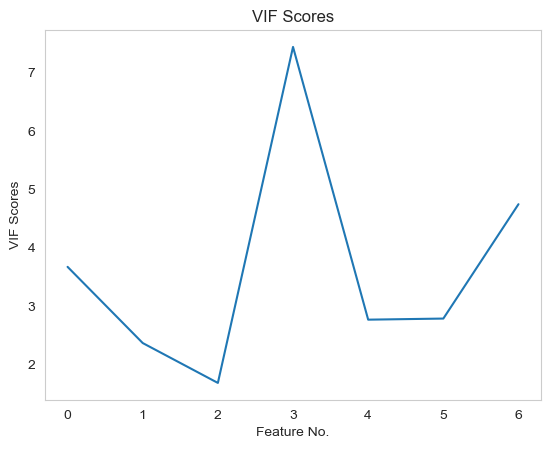

In [582]:
# calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X.shape[1])]
vif["features"] = X_vif.columns
 
# print results
print(vif)
 
# print VIF graph
plt.title("VIF Scores")
plt.xlabel("Feature No.")
plt.ylabel("VIF Scores")
plt.plot(vif["VIF Factor"])

In [583]:
# print VIF score above 5.0
vif[vif["VIF Factor"] > 5.0]

,VIF Factor,features
3,7.439988,DelayedHour


### Logistic Regression (excluding "DelayedHour")

In [585]:
# convert array to dataframe again
X = pd.DataFrame(X, columns=selected_columns)
X_pred = pd.DataFrame(X_pred, columns=selected_columns)

# set dependent/independent variables
X = X.drop('DelayedHour', axis=1)

# set dependent variables for prediction
X_pred = X_pred.drop('DelayedHour', axis=1)

X, X_pred = X.align(X_pred, join='left', axis=1, fill_value=0)

# convert NaN
imputer = SimpleImputer(strategy='mean') 
X = imputer.fit_transform(X)
X_pred = imputer.fit_transform(X_pred)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [586]:
X.shape

(2288, 6)

In [587]:
X_pred.shape

(8, 6)

In [588]:
# perform logistic regression
rl = LogisticRegression()
rl.fit(X_train, y_train)
y_rl_predict = rl.predict(X_pred)
y_pred_rl = rl.predict(X_test)

print("Score(train): ", rl.score(X_train, y_train))
print("Score(test): ", rl.score(X_test, y_test))

print(y_rl_predict)

# calculate probability
prob = rl.predict_proba(X_pred)
class_2_prob = prob[:, 1]

# show result
result = pd.DataFrame({
    'Passenger': [f"Passenger {i+1}" for i in range(len(class_2_prob))],
    'Refund Request Probability (%)': (class_2_prob * 100).round(2),
    'Refund': ["No" if y_rl_predict[i] == 0 else "Yes" for i in range(len(class_2_prob))],
})

print(result)

Score(train):  0.9426229508196722
Score(test):  0.9454148471615721
[1 0 1 0 0 0 1 0]
     Passenger  Refund Request Probability (%) Refund
0  Passenger 1                           84.43    Yes
1  Passenger 2                           14.48     No
2  Passenger 3                           85.45    Yes
3  Passenger 4                           12.45     No
4  Passenger 5                           15.05     No
5  Passenger 6                            8.47     No
6  Passenger 7                           88.17    Yes
7  Passenger 8                           14.48     No


In [589]:
# model evaluation
evaluation2 = pd.DataFrame()
evaluation2.loc['Logistics Regression', 'r2_score'] = r2_score(y_test, y_pred_lr)
r2_lr = evaluation2.loc['Logistics Regression', 'r2_score']

n = len(y_test)
p = X_test.shape[1]

evaluation2.loc['Logistics Regression', 'adjusted_r2'] = 1 - (1 - r2_rl) * ((n -1) / (n - p -1))

evaluation2

,r2_score,adjusted_r2
Logistics Regression,0.681933,0.673551


In [590]:
# convert data types to calculate VIF
selected_columns = ['Payment.Method_Debit Card', 
                    'Reason.for.Delay_Technical Issue', 
                    'Arrival.Station_Manchester Piccadilly', 
                    'DelayInMinutes', 
                    'Reason.for.Delay_Weather', 
                    'Payment.Method_Credit Card']

X_vif2 = pd.DataFrame(X, columns=selected_columns)
X_vif2[selected_columns] = X_vif2[selected_columns].astype(int)

   VIF Factor                               features
0    1.917265              Payment.Method_Debit Card
1    2.249482       Reason.for.Delay_Technical Issue
2    1.574313  Arrival.Station_Manchester Piccadilly
3    1.638293                         DelayInMinutes
4    2.740132               Reason.for.Delay_Weather
5    3.111053             Payment.Method_Credit Card


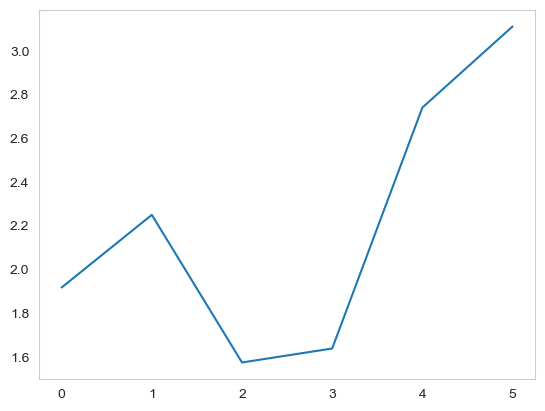

In [591]:
# calculate VIF
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X_vif2.values, i) for i in range(X.shape[1])]
vif2["features"] = X_vif2.columns
 
# print result
print(vif2)
 
# print graph
plt.plot(vif2["VIF Factor"])

#### EOF